<a href="https://colab.research.google.com/github/Ayakhaled200/Projects/blob/main/Predicting_Covid_19_Cases_using_Facebook_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicti what can be the number of confirmed cases with respect to time

In [3]:
import prophet
import pandas as pd

In [4]:
df = pd.read_csv("/content/covid_19_clean_complete.csv")

In [5]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


##Preprocessing on data

In [6]:
df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object

In [7]:
df['Date']=pd.to_datetime(df['Date'])

In [8]:
df.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
Active                     int64
WHO Region                object
dtype: object

In [9]:
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [10]:
df.shape

(49068, 10)

In [11]:
df['Date'].nunique()

188

In [12]:
total = df.groupby(['Date'])[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()

In [13]:
total.head()

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010


###Apply Prophet model on the data

In [14]:
df_prophet = total.rename(columns={'Date': 'ds', 'Confirmed': 'y'})

In [15]:
df_prophet.head()

,ds,y,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010


In [16]:
from prophet import Prophet

In [17]:
m = Prophet()

In [18]:
model = m.fit(df_prophet)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbbg931kw/bu5qmmig.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbbg931kw/o61_6oz1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67984', 'data', 'file=/tmp/tmpbbg931kw/bu5qmmig.json', 'init=/tmp/tmpbbg931kw/o61_6oz1.json', 'output', 'file=/tmp/tmpbbg931kw/prophet_model5db8uz36/prophet_model-20240414010050.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:00:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:00:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [19]:
model.seasonalities

OrderedDict([('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

###Create future data for prediction purpose

In [20]:
#this function will create a dataframe of that period and will appeand it to df_prophet
future_global = model.make_future_dataframe(periods = 30, freq= 'D') #D means i want data on daily basis

In [21]:
future_global.head()

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26


In [22]:
future_global.shape

(218, 1)

In [23]:
df_prophet.shape

(188, 5)

In [24]:
df_prophet['ds'].tail()

183   2020-07-23
184   2020-07-24
185   2020-07-25
186   2020-07-26
187   2020-07-27
Name: ds, dtype: datetime64[ns]

In [25]:
future_global.tail()

,ds
213,2020-08-22
214,2020-08-23
215,2020-08-24
216,2020-08-25
217,2020-08-26


###Doing prediction on Future data

####Predicition means on this particular day you have this number of confirmed cases
####Meanwhile Forcasting is all about showing a trend for a particular amount of time

In [26]:
prediction = model.predict(future_global)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.613281e+03,-1.229854e+05,8.453238e+04,-9.613281e+03,-9.613281e+03,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,0.0,0.0,0.0,-2.067684e+04
1,2020-01-23,-6.933404e+03,-1.192860e+05,9.824824e+04,-6.933404e+03,-6.933404e+03,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,-8.050948e+03
2,2020-01-24,-4.253528e+03,-9.834390e+04,1.163124e+05,-4.253528e+03,-4.253528e+03,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,5.827455e+03
3,2020-01-25,-1.573651e+03,-8.535825e+04,1.206111e+05,-1.573651e+03,-1.573651e+03,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.217668e+04
4,2020-01-26,1.106226e+03,-9.924476e+04,1.116640e+05,1.106226e+03,1.106226e+03,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,8.405020e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2020-08-22,2.143681e+07,2.110028e+07,2.182367e+07,2.110667e+07,2.181042e+07,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,2.145056e+07
214,2020-08-23,2.164080e+07,2.128571e+07,2.205515e+07,2.129196e+07,2.203623e+07,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,2.164810e+07
215,2020-08-24,2.184479e+07,2.144844e+07,2.227543e+07,2.148006e+07,2.226527e+07,-2102.756726,-2102.756726,-2102.756726,-2102.756726,-2102.756726,-2102.756726,0.0,0.0,0.0,2.184268e+07
216,2020-08-25,2.204878e+07,2.162762e+07,2.246601e+07,2.165967e+07,2.249364e+07,-16846.245488,-16846.245488,-16846.245488,-16846.245488,-16846.245488,-16846.245488,0.0,0.0,0.0,2.203193e+07


In [27]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
213,2020-08-22,2.145056e+07,2.110028e+07,2.182367e+07
214,2020-08-23,2.164810e+07,2.128571e+07,2.205515e+07
215,2020-08-24,2.184268e+07,2.144844e+07,2.227543e+07
216,2020-08-25,2.203193e+07,2.162762e+07,2.246601e+07
217,2020-08-26,2.224170e+07,2.180494e+07,2.273167e+07


###Visualizing the predition

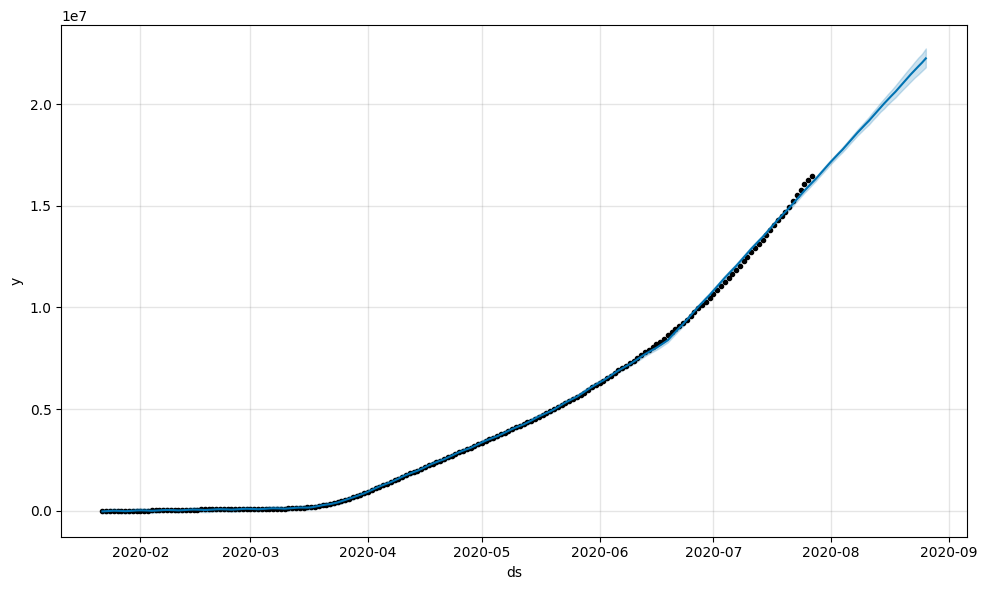

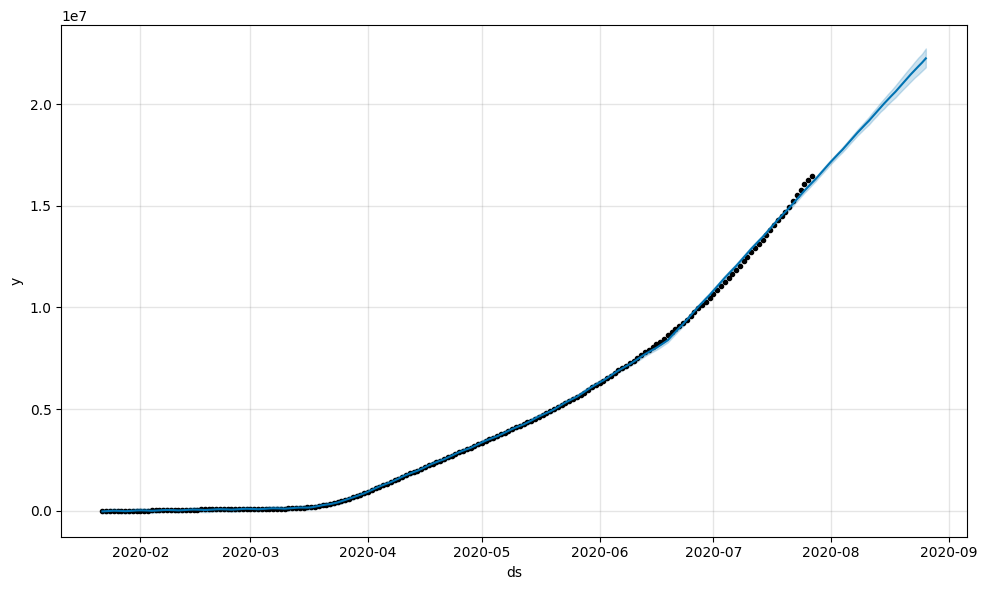

In [28]:
model.plot(prediction)
#dark blue line represent the predicted value
#black points represent the actual data
#light blue area is my trend

####it appears that the direction of overall confirmed cases is probably true because you can observe how cases actually increases exponentially.
####that's what my model is actually predictiong.

####visualizing the trend in a a weekly fashion


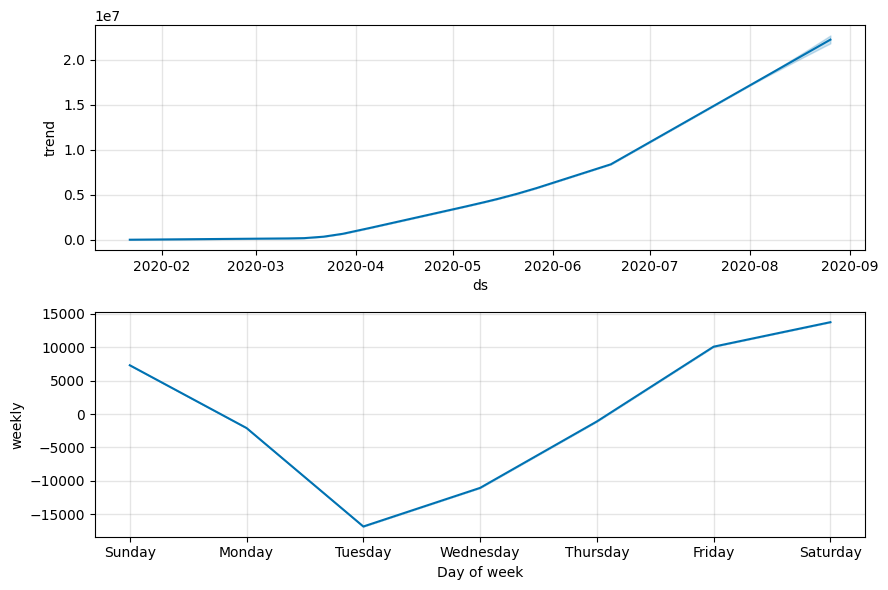

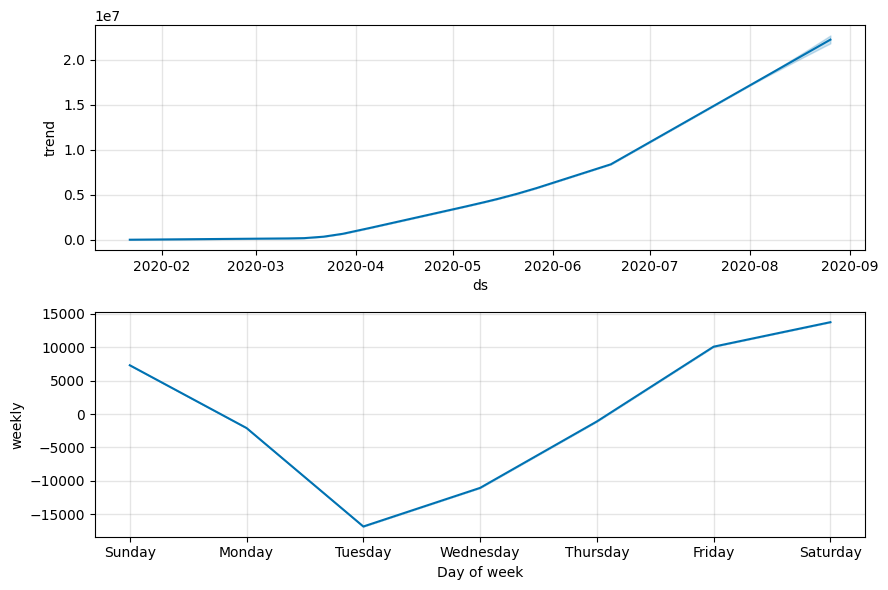

In [29]:
model.plot_components(prediction)

####visualize the points in which my trend changes

In [30]:
from prophet.plot import add_changepoints_to_plot

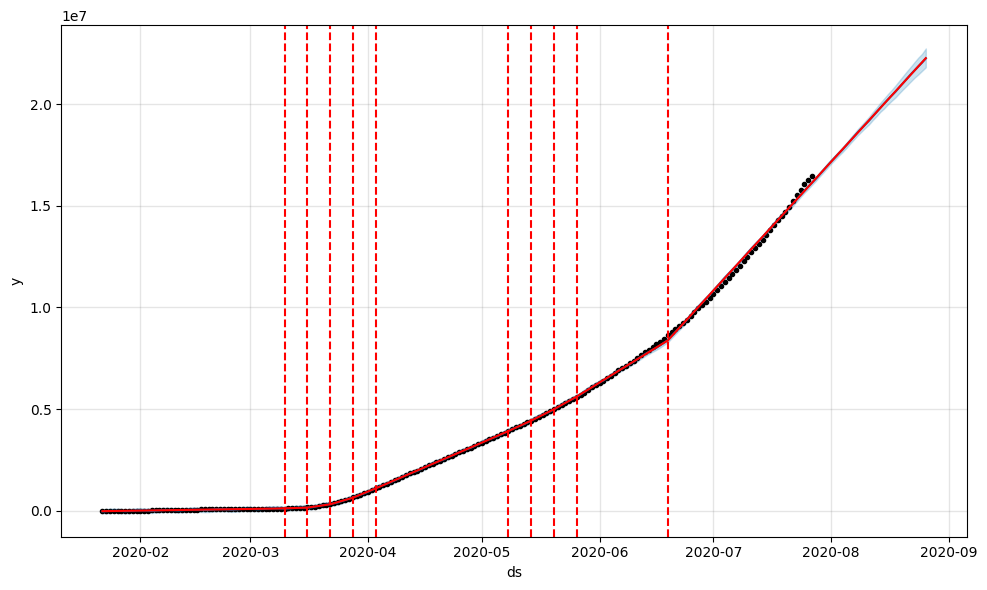

In [31]:
fig = model.plot(prediction)
a = add_changepoints_to_plot(fig.gca(),model,prediction)

###Cross Validation for the time series data

In [32]:
from prophet.diagnostics import cross_validation

In [34]:
#period -> half the horizon value
#horizon -> for how many days we have to cross validate
#initial -> 3 * horizon
df_cv = cross_validation(model,horizon = '30 days', period= '15 days', initial= '90 days')

INFO:prophet:Making 5 forecasts with cutoffs between 2020-04-28 00:00:00 and 2020-06-27 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpbbg931kw/ylf4602u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbbg931kw/sqi7x3dx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28259', 'data', 'file=/tmp/tmpbbg931kw/ylf4602u.json', 'init=/tmp/tmpbbg931kw/sqi7x3dx.json', 'output', 'file=/tmp/tmpbbg931kw/prophet_model29h9q5ty/prophet_model-20240414010306.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:03:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:03:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbbg931kw/2bx6ee0o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbbg931kw/q7lbh2qm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

In [35]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-04-29,3.201061e+06,3.195780e+06,3.206251e+06,3185195,2020-04-28
1,2020-04-30,3.285430e+06,3.279179e+06,3.291322e+06,3268876,2020-04-28
2,2020-05-01,3.369637e+06,3.361397e+06,3.377923e+06,3355922,2020-04-28
3,2020-05-02,3.450899e+06,3.439468e+06,3.462655e+06,3437608,2020-04-28
4,2020-05-03,3.530362e+06,3.514475e+06,3.547368e+06,3515244,2020-04-28


In [36]:
df_cv.shape

(150, 6)

###Obtain performance Matrix for my model

In [37]:
from prophet.diagnostics import performance_metrics

In [40]:
df_performance = performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,2.718326e+10,164873.461996,129099.938102,0.016856,0.017637,0.017038,0.000000
1,4 days,3.765761e+10,194055.691022,151268.373555,0.019316,0.022429,0.019560,0.000000
2,5 days,5.164256e+10,227249.994926,175084.443271,0.021764,0.025689,0.022083,0.066667
3,6 days,6.930525e+10,263258.910112,202055.869399,0.024541,0.026682,0.024952,0.133333
4,7 days,9.005171e+10,300086.167259,232399.833414,0.027823,0.031241,0.028347,0.200000


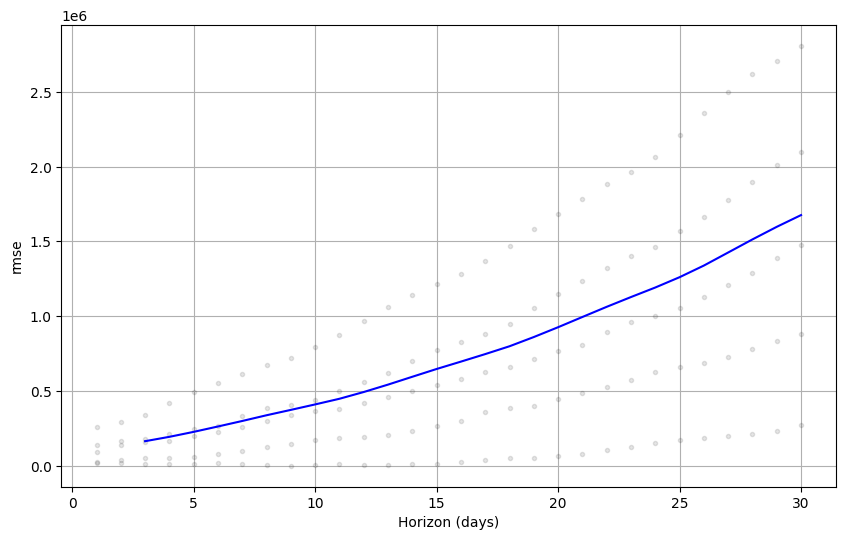

In [43]:
from prophet.plot import plot_cross_validation_metric
df_performance = plot_cross_validation_metric(df_cv, metric = 'rmse', point_color='black')

####it seems it's a very good model as rmse is very low, somewhere clode to 1e^6

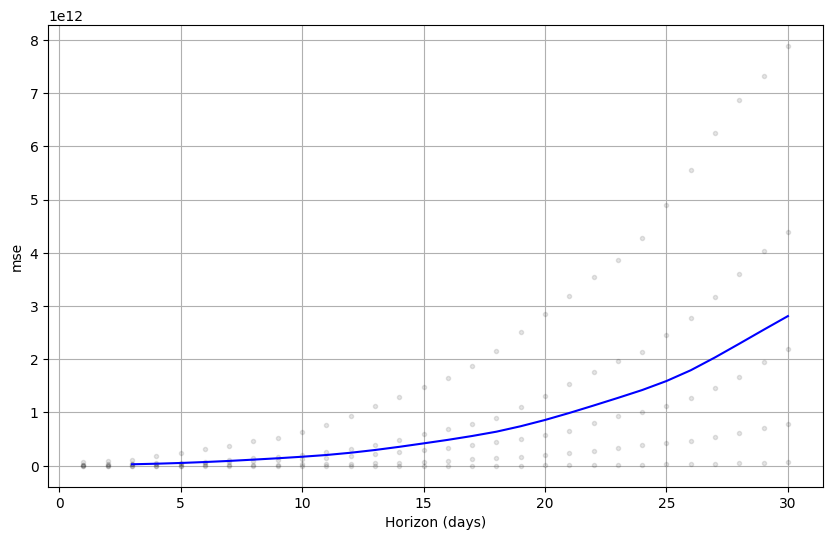

In [45]:
df_performance = plot_cross_validation_metric(df_cv, metric = 'mse', point_color='black')

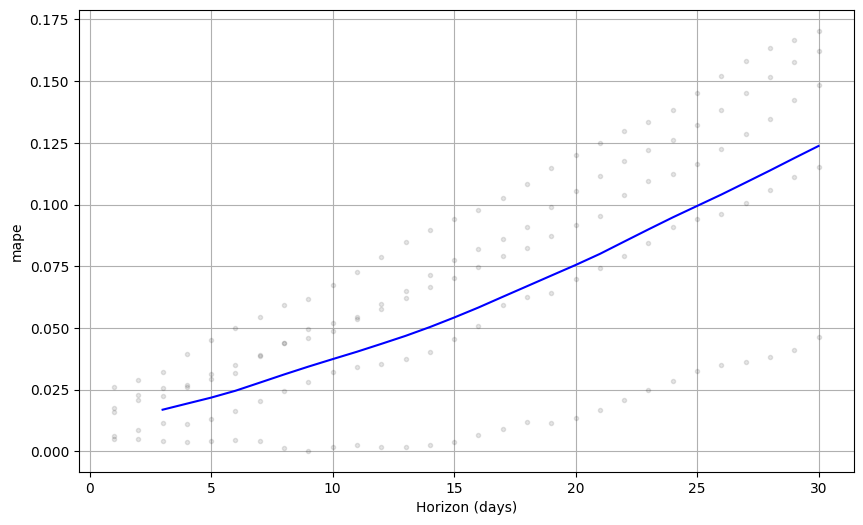

In [46]:
#Mean absolute percentage
df_performance = plot_cross_validation_metric(df_cv, metric = 'mape', point_color='black')